# https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

-> 의사결정트리


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_label = iris.target

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df["label"] = iris.target



X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train 개수:  120 , X_test 개수:  30
(120, 4) (120,)
(30, 4) (30,)


In [2]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

decision_tree.fit(X_train, y_train)

classifier


DecisionTreeClassifier(random_state=32)

training dataset으로 모델을 학습시킨다는 것은, 달리 말하면 training dataset에 맞게 모델을 fitting, 즉 맞추는 것이라고 할 수 있습니다. training dataset에 있는 데이터들을 통해 어떠한 패턴을 파악하고, 그 패턴에 맞게 예측을 할 수 있도록 학습되기 때문입니다.

다른 말로 하면 모델은 training dataset에 존재하지 않는 데이터에 대해서는 정확한 정답 카테고리가 무엇인지 알지 못합니다. 다만 training dataset을 통해 학습한 패턴으로 새로운 데이터가 어떤 카테고리에 속할지 예측할 뿐이죠.


In [3]:
# 테스트데이터 X_test로 예측하기
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

## 정확도 = 예측 결과가 정답인 데이터의 개수 / 예측한 전체 데이터 수

- 따라서, 모든 데이터가 한쪽 방향으로 쏠린 경우에는 정확도는 좋은 척도가 아님. (예측 성능이 구려도 정확도는 높게 나올 수 있음.)


In [4]:
# 실제 정답 y_test과 예측값 y_pred 비교하여 정확도 측정하기
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy
## 30개 중 27개를 맞게 예측함. 

0.9

In [5]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# (4) 모델 학습 및 예측
# 모델 바꾸고 싶으면 여기만 바꾸면 됨. 위는 학습이기 때문에 유지.
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
# 예측값은 항상 위와 같은 형식.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



# https://medium.com/@deepvalidation/title-3b0e263605de

-> 랜덤포레스트


# --------


# https://excelsior-cjh.tistory.com/66?category=918734

-> 서포트 벡터 머신 (SVM)


In [6]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [7]:
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



# https://scikit-learn.org/stable/modules/sgd.html

-> Stochastic Gradient Descent Classifier


In [9]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

classifier


In [10]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.50      0.67        12
           2       0.65      1.00      0.79        11

    accuracy                           0.80        30
   macro avg       0.88      0.83      0.82        30
weighted avg       0.87      0.80      0.79        30



# 로지스틱


In [11]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [12]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.datasets import load_digits

digits = load_digits() # Dictionary 자료형과 유사한 sklearn.utils.Bunch 자료형 
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [14]:
digits_data = digits.data
digits_data.shape  # (손글씨 이미지의 개수, 이미지 당 Pixel 수)
# 총 1797개의 데이터, 64개의 숫자로 이루어짐.

(1797, 64)

In [15]:
digits_data[0] # 각 이미지가 64개의 Piexel로 구성된 것을 확인할 수 있습니다.

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

digits_data[0] # 각 이미지가 64개의 Piexel로 구성된 것을 확인할 수 있습니다.


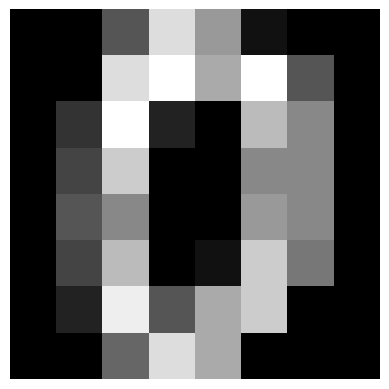

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 
# 브라우저에서 바로 그림을 볼 수 있게 해주는 역할을 합니다 

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
# 일렬로 펴진 64개 데이터를 (8, 8)로 reshape해주는 것을 잊으면 안 됩니다!
plt.axis('off')
plt.show()

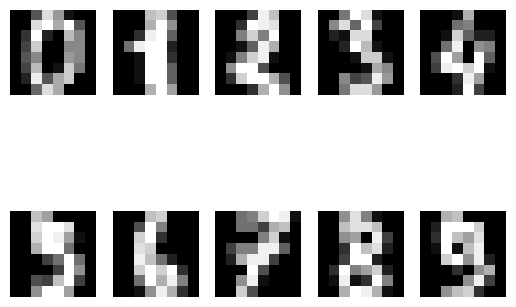

In [17]:
for i in range(10):
    plt.subplot(2, 5, i+1) # 10개의 이미지를 2행 5열로 표시
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray') 
    # plt.imshow()는 (m,n) 형태의 데이터를 입력으로 받기 때문에
    # 데이터셋 내의 1열로 펼쳐진 64개의 데이터를 원래의 이미지 형태인 (8,8)로 복원
    # cmap은 해당 이미지의 색상을 지정(gray는 흑백으로 출력)
    plt.axis('off') # 축을 보이지 않게 해줍니다. 
plt.show()

In [18]:
digits_label = digits.target # 각 이미지가 나타내는 숫자를 의미합니다.
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

총 1,797개의 데이터가 있고, 0부터 9까지의 숫자로 나타나는군요. 바로 각 이미지 데이터가 어떤 숫자를 나타내는지를 담고 있는 데이터입니다.


붓꽃 문제와 같이, 각 이미지 데이터가 입력되었을 때 그 이미지가 숫자 몇을 나타내는 이미지인지를 맞추는 분류 모델을 학습시키면 됩니다.

다만 이번에는 정확도의 함정을 확인하는 실험이기 때문에 약간의 장치를 넣어볼 것입니다.

숫자 10개를 모두 분류하는 것이 아니라, 해당 이미지 데이터가 3인지 아닌지를 맞히는 문제로 변형해서 풀어보는 것입니다. 즉 입력된 데이터가 3이라면 3을, 3이 아닌 다른 숫자라면 0을 출력하도록 하는 모델을 생각해 보겠습니다.

그러려면 target인 digits_label을 아래와 같이 살짝 변형할 필요가 있습니다.


In [19]:
# 각 Label을 참조하여, 해당 이미지가 나타내는 숫자가 3이라면 3을 할당하고, 3이 아니라면 0을 할당하여 새로운 칼럼 new_label을 생성합니다.
new_label = [3 if i == 3 else 0 for i in digits_label] 
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

네, 기존의 label인 digits_label에서 숫자가 3이라면 그대로 3을, 아니라면 0을 가지는 new_label을 만드는 거죠.

이제 이 문제를 풀기 위해 다시 Decision Tree를 학습시켜보겠습니다.


In [20]:
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

'''
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)


# test_size : 전체 데이터 셋 중 Test Dataset에 포함하려고 하는 비율 
# shuffle : Training Dataset과 Test Dataset으로 나누기 전에, 데이터들을 뒤섞을지 여부
'''
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size=0.2,
                                                    random_state=15)

decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train) # 의사결정나무 모델로 학습
y_pred = decision_tree.predict(X_test) # 테스트 결과 예측

accuracy = accuracy_score(y_test, y_pred) # y_pred(답안지)를 y_test(정답지)로 채점
accuracy # 정확도 출력

0.9388888888888889

바로 이곳에 함정이 있습니다. 어떤 함정일까요? 우리가 풀려고 했던 문제를 생각해봅시다. 총 10개의 숫자 중 3에만 집중을 해서, 3이라면 3으로, 3이 아니라면 0으로 맞추는 문제로 변형했었죠.

그런 이유로, 정답 데이터인 label은 0이 매우 많고 3은 적은 불균형 데이터가 되었습니다. 9개의 숫자들은 label이 모두 0이 되었고, 3만 3으로 남아있었으니 대략 90%의 label이 모두 0이라는 이야기가 되죠.

## 모델이 전혀 학습하지 않고 정답을 모두 0으로만 선택해도 정확도가 90%가량이 나오게 된다는 것입니다.


In [21]:
fake_pred = [0] * len(y_pred) # 0으로만 이루어진 가짜 답안지 준비

accuracy = accuracy_score(y_test, fake_pred) # fake_pred(가짜 답안지)를 y_test(정답지)로 채점
accuracy # 정확도 출력

0.925

# 불균형한 데이터에서는, accuracy가 좋은 척도가 되지 못한다.


양성 데이터를 얼마나 많이 맞았느냐도 중요하겠지만, 음성 데이터를 얼마나 안 틀렸느냐도 중요한 경우가 있습니다. 이는 문제에 따라 달라지죠.

예를 들어 코로나바이러스에 감염되었는지 얼마나 많은 의심되는 환자를 진단하는 경우,

### 실제 음성인데 양성으로 오진을 하면 그나마 환자에게는 다행인 일입니다. 하지만 실제 양성인데 음성이라고 오진을 하는 경우는 환자에게 치명적인 상황이 될 것입니다.

### 이렇듯 같은 오진이라도 양성을 잡아내는 데에 실패하는 오진과, 음성을 잡아내는 데에 실패하는 오진은 그 중요도가 다를 수 있습니다.

## 이렇게 정답과 오답을 구분하여 표현하는 방법을 오차 행렬(confusion matrix) 이라고 합니다.


https://kylo8.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%98%A4%EC%B0%A8%ED%96%89%EB%A0%AC-%EC%A0%95%ED%99%95%EB%8F%84-%EC%A0%95%EB%B0%80%EB%8F%84%EC%9E%AC%ED%98%84%EC%9C%A8
-> 오차행렬, 정확도, 정밀도, 재현율, f1score, roc_auc_score 구하기


오차행렬


In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[320,  13],
       [  9,  18]])

아래는 fake로 학습한 오차행렬


In [27]:
confusion_matrix(y_test, fake_pred)
# 모든 값을 Negative로 예측했기 때문에 2열은 죄다 0.

array([[333,   0],
       [ 27,   0]])

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



0은 개수가 333개로 많기 때문에 precision과 recall에서 모두 0.97, 0.96으로 어렵지 않게 높은 점수를 받았습니다. 반면 3은 27개뿐이기 때문에 모두 맞추기가 어려웠나 봅니다. precision과 recall은 각각 0.58, 0.67이 나왔군요.


In [29]:
print(classification_report(y_test, fake_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           3       0.00      0.00      0.00        27

    accuracy                           0.93       360
   macro avg       0.46      0.50      0.48       360
weighted avg       0.86      0.93      0.89       360



이게 무슨 일이죠? 0에 대한 precision과 recall은 0.93, 1로 매우 높지만 3에 대한 precision과 recall은 둘 다 0입니다. 이건 큰 문제입니다. 0은 잘 잡아내지만, 3은 단 하나도 맞추지 못했다는 뜻이니까요.


---


마지막으로 유방암 여부를 진단해 보겠습니다.

이 데이터 또한 여러 사람의 건강 지표에 대한 데이터가 feature로 들어가있고, 유방암의 여부가 True, False로 label이 됩니다.

주어진 데이터로 환자의 유방암 여부를 분류해 볼 수 있을까요?


In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 데이터 불러오기
bc = load_breast_cancer()
print(type(dir(bc)))  

#bc에 어떤 정보들이 담겨있는지 확인하기
print("bc에 담겨진 정보 : ", bc.keys())

#Feature Data 지정하기
bc_data = bc.data

#bc_data 크기 확인해보기(배열의 형상정보 출력하기)
print( bc_data.shape )

#샘플로 bc_data에서 하나의 데이터만 확인해 보기)
print( bc_data[0] )

bc_label = bc.target
print(bc_label.shape)
print(bc_label)

#라벨의 이름을 출력해 봅시다. 
print(bc.target_names)
# benign : (of a disease) not harmful in effect.
# malignant : (of a disease) very virulent or infectious.

#데이터의 설명이 담겨있는 변수를 출력해 봅시다. 
print(bc.DESCR)

#feature에 대한 설명이 담긴 변수를 출력해 봅시다. 
print(bc.feature_names)

# 데이터셋 파일이 저장된 경로를 출력해 봅시다. 
print(bc.filename)

<class 'list'>
bc에 담겨진 정보 :  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(569, 30)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 

In [36]:
import pandas as pd

#유방암 데이터셋을 pandas가 제공하는 DataFrame이라는 자료형으로 변환하기 
bc_df = pd.DataFrame(data=bc_data, columns=bc.feature_names)

#정답 데이터를 `label` 이라는 컬럼으로 추가 해 주기 
bc_df["label"] = bc.target
bc_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [37]:
# sklearn.model_selection 패키지의 train_test_split을 활용
from sklearn.model_selection import train_test_split

# trainig dataset과 test dataset을 간단히 분리해 봅시다.
X_train, X_test, y_train, y_test = train_test_split(bc_data, 
                                                    bc_label, # bc.target과 같음. 정답 데이터 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train), ', y_test 개수: ', len(y_test))

X_train 개수:  455 , X_test 개수:  114
y_train 개수:  455 , y_test 개수:  114


In [38]:
# 의사결정트리 사용해보기 
#사이킷런의 의사결정트리를 import 합니다. 
from sklearn.tree import DecisionTreeClassifier

#의사결정 트리를 선언합니다. 
decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

#훈련데이터로 의사결정트리를 학습합니다. 
decision_tree.fit(X_train, y_train)

classifier


DecisionTreeClassifier(random_state=32)

In [39]:
# 랜덤포레스트 
#사이킷런의 랜덤포레스트를 import 합니다. 
from sklearn.ensemble import RandomForestClassifier

#랜덤 포레스트를 생성합니다. 
random_forest = RandomForestClassifier(random_state=32)
print(random_forest._estimator_type)

#훈련데이터로 랜덤포레스트를 학습합니다. 
random_forest.fit(X_train, y_train)

classifier


RandomForestClassifier(random_state=32)

In [40]:
# SVM
#사이킷런의 svm을 import 합니다. 
from sklearn import svm

#svm을 생성합니다.
svm_model = svm.SVC()
print(svm_model._estimator_type)

#훈련데이터로 svm분류모델을 학습합니다. 
svm_model.fit(X_train, y_train)

classifier


SVC()

In [46]:
# SGD 
#사이킷런의 SGD Classifier 모델을 import 합니다. 
from sklearn.linear_model import SGDClassifier

#sgd classifier를 생성합니다. 
sgd_model = SGDClassifier()
print(decision_tree._estimator_type)

#훈련데이터로 SGC분류기를 학습합니다. 
sgd_model.fit(X_train, y_train)

classifier


SGDClassifier()

In [45]:
#사이킷런의 로지스틱 회귀를 import 합니다. 
from sklearn.linear_model import LogisticRegression

#의사결정 트리를 선언합니다. 
logistic_model = LogisticRegression(random_state=32)
print(logistic_model._estimator_type)

#훈련데이터로 로지스틱 회귀를 학습합니다. 
logistic_model.fit(X_train, y_train)

classifier


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=32)

의사결정트리 모델 평가


In [43]:
#모델의 predict 함수를 이용해서 X_test를 예측해 주세요 
y_pred = decision_tree.predict(X_test)
print(y_pred)

# sklearn.metrics의 accuaracy_score함수를 import 해 주세요
from sklearn.metrics import accuracy_score

#y_test 와  y_pred를 인자로 넣어 정확도를 구해 주세요
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1]
0.9122807017543859


In [47]:
model_list = [decision_tree, random_forest, svm_model, sgd_model, logistic_model]

y_pred_list = []

for model in model_list:
  y_pred_list.append(model.predict(X_test))
  
acc_list = []

for y_pred in y_pred_list : 
  acc_list.append(accuracy_score(y_test, y_pred))
  
print(acc_list)

[0.9122807017543859, 1.0, 0.9035087719298246, 0.868421052631579, 0.9385964912280702]


정확도는 Random Forest가 1로 가장 높고, SVM이 약 0.89로 가장 낮다. 하지만 유방암의 경우, 양성을 음성으로 판정하면 안 되므로 정확도보다 Recall이 모델의 성능을 평가하는 지표로 적당하다.
